In [325]:
import numpy as np
import matplotlib.pyplot as plt
AffPrint = True
Aff3DPop = True

# %% La fonction Weierstrass
def f_Weierstrass(x,triplet):
    a,b,c = triplet
    res = 0
    for k in range(c+1):
        res += (a**k) * np.cos((b**k)*np.pi*x)
    return res

print(f_Weierstrass(1.933,(0.5,11,20)))

0.7073080367540577


In [326]:
# %% Recupération du data Observations
import pandas as pd
observs = pd.read_csv('temperature_sample_calibrate.csv',sep =";")

observs.head()

,#i,t
0,0.093,0.812
1,0.648,-0.489
2,1.487,-0.214
3,1.786,0.635
4,1.287,-0.592


In [327]:
# dans cette exercice, un individu est rpz par un triplet (a,b,c)
(a, b, c) = (0.0, 0, 0) # float a, int b, int b

In [328]:
# %% Creer individu aléatoire
import random
def IndividuAleatoire():
  a = random.random()
  while a == 0:
       a = random.random()
  b = random.randint(1,20)
  c = random.randint(1,20)
  return (a,b,c)

ind1 = IndividuAleatoire()
print(ind1)

(0.6934152896672215, 8, 16)


In [329]:
# %% La fonction Cout:
# on ajoute la différence entre la fonction Weierstrass et les températures observées f_Weierstrass(i)-t_observé(i), pour chaque instants i données
def Cout(indiv):
  global observs
  cout = 0
  for k in range(len(observs["#i"])):
    diff = f_Weierstrass(observs["#i"][k],indiv)-observs["t"][k]  
    cout += abs(diff)       
  return cout

ind1 = (0.4,2,17) 
cout1 = Cout(ind1)
ind2 = (0.4,2,5) # on remarque que le param c n'est pas très sensible
cout2 = Cout(ind2)
print(ind1,cout1)
print(ind2,cout2)


(0.4, 2, 17) 6.289474211207157
(0.4, 2, 5) 6.271657962950028


In [330]:
# %% La focntion selection

def Selection(population, listeCouts, pourcentage): 
    N = int(round(len(population)*pourcentage))
    if AffPrint:
        print(" # ...",N,"individu ont étés sélectionnés")
    listeCouts = np.reciprocal(listeCouts) 
    listeCouts = listeCouts / np.sum(listeCouts) 
    #print(listeCouts)
    pop=[]
    i=0
    while i < N:
        s=random.choices(population, weights=listeCouts)[0]
        if s not in pop:
            pop.append(s)
            i+=1
    return pop

popu=[IndividuAleatoire() for i in range(4)]
couts=[Cout(i) for i in popu]
deschamps=Selection(popu,couts, 0.5)
print(popu)
print(deschamps)


 # ... 2 individu ont étés sélectionnés
[(0.424452737975069, 10, 19), (0.6480368429841625, 12, 8), (0.9467826271031008, 20, 5), (0.7946873065809049, 19, 6)]
[(0.424452737975069, 10, 19), (0.7946873065809049, 19, 6)]


In [331]:
# %% Opérateur de croisement
def Croisement(id1,id2):
    newa = (id1[0] + id2[0])/2 #Nouveau paramètre a du croisé
    newb = (id1[1] + id2[1])/2 
    newb = int(round(newb,0)) # Nouveau paramètre b du croisé
    newc = (id1[2] + id2[2])/2
    newc = int(round(newc,0)) # Nouveau paramètre c du croisé
    return (newa,newb,newc)

ind1 = IndividuAleatoire()
ind2 = IndividuAleatoire()
ind3 = Croisement(ind1,ind2)
print(ind1,ind2)
print(ind3)


(0.07546723213680506, 3, 6) (0.7802944300912767, 2, 11)
(0.4278808311140409, 2, 8)


In [332]:
# %% Opérateur de mutation
def Mutation(indiv):
    indiv = list(indiv)
    # on a vu que l'attribut c de nos indivus n'était pas très sensible, après mutation de celui-ci on ne sentais pas de réel différence avec le cout
    # on a 100% de chance que l'attribu c mute 
    indiv[2]+=1
    indiv[2] = indiv[2] % 20

    k = random.randint(0,2) # on a 33% de chance que a mute, et 33% de chances que b mute
    if k == 0: # si a
        indiv[k]+= random.random() # [O,1[
        indiv[k] = indiv[k] % 1
    elif k == 1: # si b 
        indiv[k]+=1
        indiv[k] = indiv[k] % 20
    return tuple(indiv)

ind1 = IndividuAleatoire()
print(ind1)
print(Mutation(ind1))

(0.7731324506847626, 16, 14)
(0.7731324506847626, 16, 15)


In [333]:
def Afficher3Dpopulation(num,populationFinale,h=10,l=8):
    plt.figure(figsize=(h,l))
   
    ax = plt.axes(projection='3d',title=f"Population ({len(populationFinale)}) Génération "+str(num))

    # Data for a three-dimensional line
    coutline = np.array([Cout(res) for res in populationFinale])
    zline = [res[0] for res in populationFinale]
    xline = [res[1] for res in populationFinale]
    yline = [res[2] for res in populationFinale]
    ax.set_xlabel('b')
    ax.set_ylabel('c')
    ax.set_zlabel('a')
    ax.scatter3D(xline, yline, zline,c=coutline,s=np.reciprocal(coutline)*500,marker="^")
    ax.view_init(5,78)
    plt.show()


In [334]:
# %% *** DEMMARAGE ***

## La fonction qui croise un pourcentage (pris en paramètre) de la population 
def FaireCroisement(pop,pourcentagePlus):
    combien = int(round(len(pop)*(pourcentagePlus)))
    if AffPrint:
        print(" # ...",combien,"nouveau enfants ajouté après croisement")
    for k in range(combien):
        a = random.choice(pop)
        b = random.choice(pop)
        pop.append(Croisement(a,b))   
    return pop

## La fonction qui mute un pourcentage (pris en paramètre) de la population 
def FaireMutation(pop,pourcentageDeMutee): # un mm bail peut etre muter plusieur fois
    combien = int(round(len(pop)*pourcentageDeMutee))
    if AffPrint:
        print(" # ...",combien,"individu ont muté")
    dejaMutee = []
    for k in range(combien):
        i = random.randint(0,len(pop)-1)
        while i in dejaMutee:
            i = random.randint(0,len(pop)-1)
        #print("indice",i)
        pop[i] = Mutation(pop[i])
        dejaMutee.append(i)
    return pop

## La fonction qui retourne le meilleur individu
def LeBoss(population):
    min = population[0]
    for b in population:
        if Cout(b) < Cout(min):
            min = b
    return min # retourne un individu
    
def VariancePop(p):
    couts = np.array([Cout(x) for x in p])
    return np.var(couts)

def DemarrerGene_rec(population,Stop):
    prof = 0
    resultats_meilleurs_individus = [(prof,LeBoss(population))]
    resultats_variances = [(prof,VariancePop(population))]
    while prof < Stop:
        if AffPrint:
            print(" ##################"" GENERATION",prof)
            print(f" # Population ({len(population)}) :",population[0:5]) #(par souci de visibilité, la population affiché ne rpz que les 5 premier individu)
            print(" # ...")
            ### Qui est le meille à ce stade ?
            print(f" # ... {LeBoss(population)} est le meilleur individu parmi {len(population)} individus")
        if Aff3DPop:
            Afficher3Dpopulation(prof,population,8,6)
        ### Evaluation
        listCouts = np.array([Cout(ind) for ind in population])
        #print(" # Liste Couts :",listCouts[0:5])
        ### Selection
        population = Selection(population,listCouts,0.5)
        #print(" # Après Selection :",population[0:5])
        ### Croisements
        population = FaireCroisement(population,1.05) # la popupation augmente de +105% avec des enfants
        #print(" # Après Croisement :",population[0:5])
        ### Mutations
        population = FaireMutation(population,0.01) #montrer à mlacahe tester avec 0.5, 0.1 et # bon resultat avec 0.005
        #print(" # Après Mutation :",population[0:5])
        ###
        prof+= 1 
        resultats_meilleurs_individus.append((prof,LeBoss(population))) 
        resultats_variances.append((prof,VariancePop(population))) 
        
         
    return LeBoss(population),population,resultats_meilleurs_individus,resultats_variances

def DemarrerGene(nbPdepart,nbGene):
    # Population de départ
    population = [IndividuAleatoire() for i in range(nbPdepart)] 
    return DemarrerGene_rec(population,nbGene) # Retourne le plus fort de la population après un nombre NbGEne de générations


In [335]:
nbPopulationDepart = 800
nombreDeGeneration =  8
AffPrint = True
Aff3DPop = True

 ################## GENERATION 0
 # Population (800) : [(0.33871286575435433, 1, 18), (0.8330182291545015, 8, 1), (0.49491536315292806, 11, 6), (0.05456348536245126, 5, 3), (0.9645757699524675, 18, 12)]
 # ...
 # ... (0.1139463519590721, 13, 1) est le meilleur individu parmi 800 individus


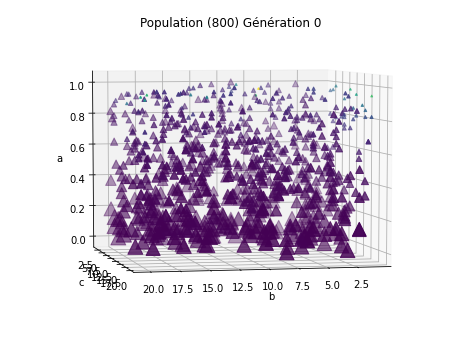

 # ... 400 individu ont étés sélectionnés
 # ... 420 nouveau enfants ajouté après croisement
 # ... 8 individu ont muté
 ################## GENERATION 1
 # Population (820) : [(0.24117163875626213, 8, 15), (0.7019594137051827, 17, 11), (0.12093481873482925, 12, 16), (0.47336522801000713, 15, 18), (0.10839317425120687, 17, 3)]
 # ...
 # ... (0.1139463519590721, 13, 1) est le meilleur individu parmi 820 individus


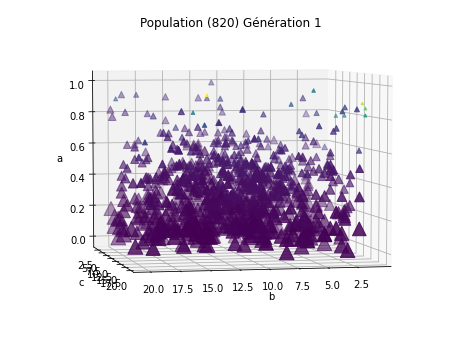

 # ... 410 individu ont étés sélectionnés
 # ... 430 nouveau enfants ajouté après croisement
 # ... 8 individu ont muté
 ################## GENERATION 2
 # Population (840) : [(0.1111008629639314, 3, 18), (0.20477556609771597, 2, 13), (0.07882452057250933, 19, 9), (0.10431035668882174, 10, 10), (0.11700580611138839, 14, 7)]
 # ...
 # ... (0.1139463519590721, 13, 1) est le meilleur individu parmi 840 individus


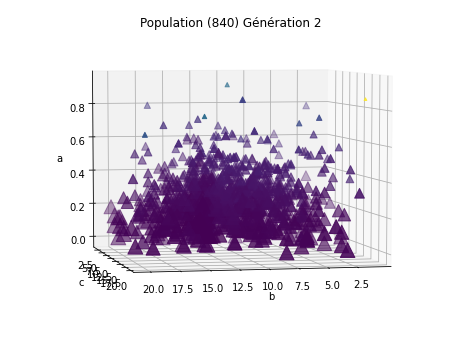

 # ... 420 individu ont étés sélectionnés
 # ... 441 nouveau enfants ajouté après croisement
 # ... 9 individu ont muté
 ################## GENERATION 3
 # Population (861) : [(0.3382387998910773, 15, 8), (0.3861779265535581, 14, 8), (0.2812476345053747, 11, 19), (0.32876976819351084, 8, 6), (0.4202951744799537, 16, 3)]
 # ...
 # ... (0.1139463519590721, 13, 1) est le meilleur individu parmi 861 individus


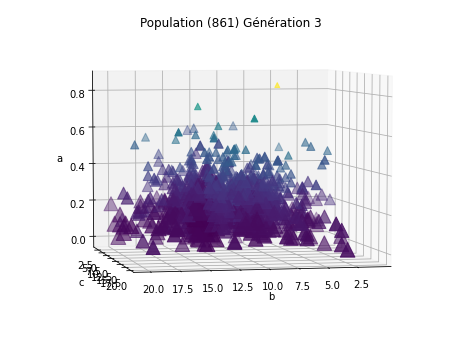

 # ... 430 individu ont étés sélectionnés
 # ... 452 nouveau enfants ajouté après croisement
 # ... 9 individu ont muté
 ################## GENERATION 4
 # Population (882) : [(0.408640802035321, 12, 14), (0.18206786117591317, 8, 14), (0.08238412745410521, 15, 9), (0.21021146512040995, 11, 10), (0.11128386130590284, 10, 6)]
 # ...
 # ... (0.1139463519590721, 13, 1) est le meilleur individu parmi 882 individus


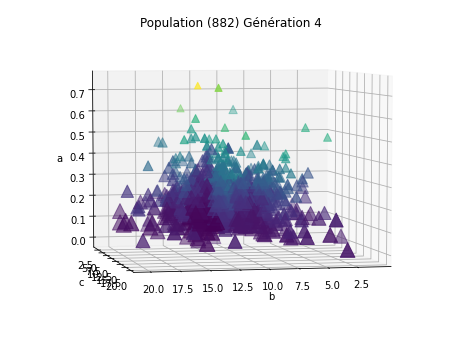

 # ... 441 individu ont étés sélectionnés
 # ... 463 nouveau enfants ajouté après croisement
 # ... 9 individu ont muté
 ################## GENERATION 5
 # Population (904) : [(0.056724094913930406, 8, 9), (0.17554693798442053, 14, 9), (0.2700717704486491, 12, 9), (0.2353467780209848, 13, 11), (0.11128386130590284, 10, 6)]
 # ...
 # ... (0.1172003057320408, 13, 10) est le meilleur individu parmi 904 individus


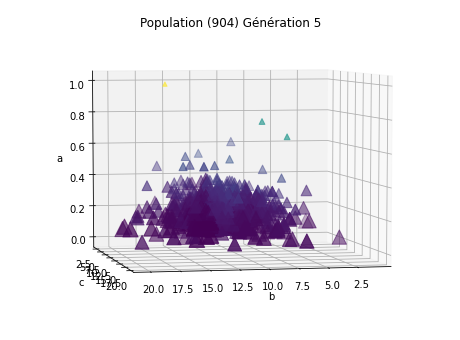

 # ... 452 individu ont étés sélectionnés
 # ... 475 nouveau enfants ajouté après croisement
 # ... 9 individu ont muté
 ################## GENERATION 6
 # Population (927) : [(0.19883423420942237, 7, 9), (0.07707123690972228, 9, 10), (0.2762229119001818, 10, 10), (0.17320222875453495, 14, 11), (0.18459584913801813, 12, 10)]
 # ...
 # ... (0.11828926589888247, 13, 12) est le meilleur individu parmi 927 individus


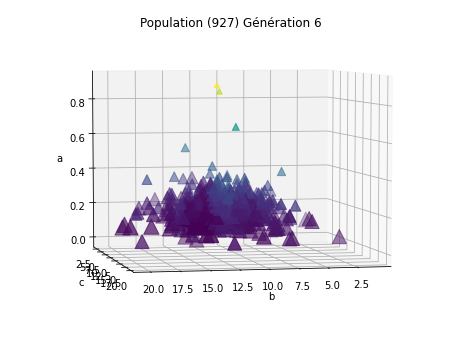

 # ... 464 individu ont étés sélectionnés
 # ... 487 nouveau enfants ajouté après croisement
 # ... 10 individu ont muté
 ################## GENERATION 7
 # Population (951) : [(0.2833951395705853, 10, 11), (0.27918717067705856, 13, 10), (0.1862971217241209, 9, 8), (0.22980586242113688, 15, 9), (0.20904141577097735, 11, 10)]
 # ...
 # ... (0.11828926589888247, 13, 12) est le meilleur individu parmi 951 individus


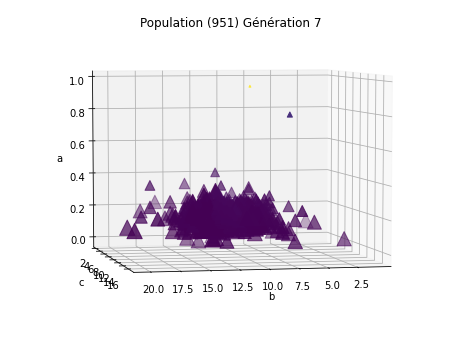

 # ... 476 individu ont étés sélectionnés
 # ... 500 nouveau enfants ajouté après croisement
 # ... 10 individu ont muté
 ################## GENERATION 8 FINAL 
      ############# LE MEILLEUR INDIVIDU: (0.10223580402091098, 13, 9)  avec un coût : 1.7978244934200183
9 resultats_individus #  [(0, (0.1139463519590721, 13, 1)), (1, (0.1139463519590721, 13, 1)), (2, (0.1139463519590721, 13, 1)), (3, (0.1139463519590721, 13, 1)), (4, (0.1139463519590721, 13, 1)), (5, (0.1172003057320408, 13, 10)), (6, (0.11828926589888247, 13, 12)), (7, (0.11828926589888247, 13, 12)), (8, (0.10223580402091098, 13, 9))]


In [336]:
LeMeilleur, populationFinale, resultats_individus,resultats_vari = DemarrerGene(nbPopulationDepart,nombreDeGeneration)  
print(f" ################## GENERATION {nombreDeGeneration} FINAL \n      ############# LE MEILLEUR INDIVIDU:",LeMeilleur," avec un coût :",Cout(LeMeilleur))
print(len(resultats_individus),"resultats_individus # ",resultats_individus)

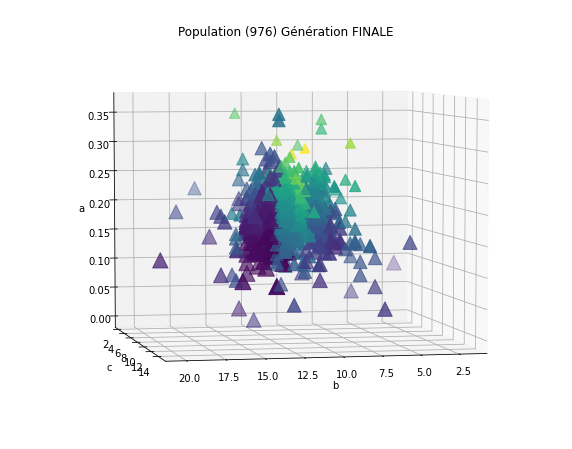

In [337]:
Afficher3Dpopulation("FINALE",populationFinale)

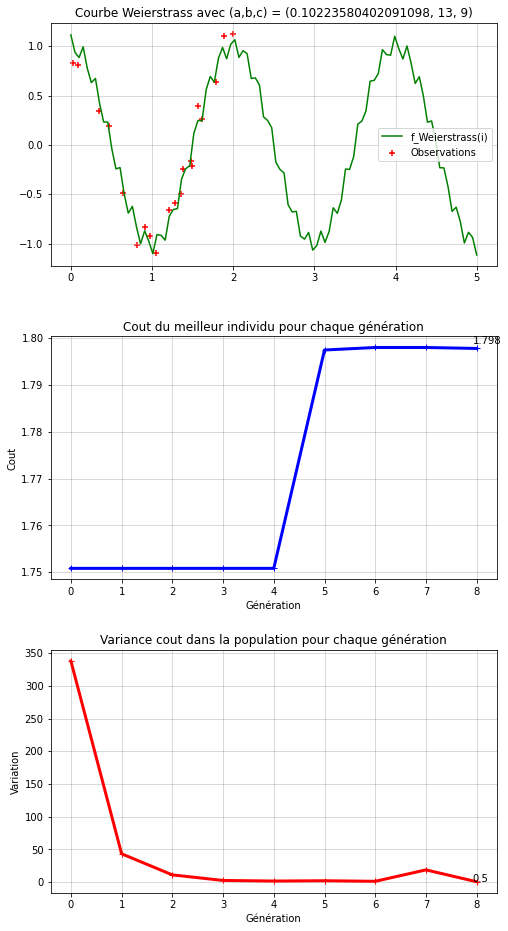

In [338]:

#x_min,x_max = -1, 6
#y_min,y_max = -1.5, 1.5

x = np.linspace(0,5,100)
y = f_Weierstrass(x,LeMeilleur)

xres = [res[0] for res in resultats_individus]
yres = np.array([Cout(res[1]) for res in resultats_individus])

xvar = [var[0] for var in resultats_vari]
yvar = np.array([var[1] for var in resultats_vari])
#plt.xlim(x_min,x_max)
#plt.ylim(y_min,y_max)

plt.figure(figsize=(8,16))
plt.subplots_adjust(hspace = 0.29 )
plt.subplot(311)
plt.title("Courbe Weierstrass avec (a,b,c) = "+str(LeMeilleur))
plt.scatter(observs["#i"],observs["t"],color="red",marker="+")
plt.plot(x,y, color="green", linewidth=1.5)
plt.legend(["f_Weierstrass(i)", "Observations"]) 
plt.grid(True,alpha=0.6,linestyle='-')


plt.subplot(312)
plt.title("Cout du meilleur individu pour chaque génération")
plt.plot(xres,yres, "b-+", linewidth=3)
plt.grid(True,alpha=0.6,linestyle='-')
#plt.legend(["blabal "], ncol = 1, loc = 'lower left') 
plt.ylabel('Cout')
plt.xlabel('Génération')
plt.text(nombreDeGeneration*0.99, Cout(LeMeilleur)*1.0005, str(round(Cout(LeMeilleur),3)))

plt.subplot(313)
plt.title("Variance cout dans la population pour chaque génération")
plt.plot(xvar,yvar, "r-+", linewidth=3)
plt.grid(True,alpha=0.6,linestyle='-')
#plt.legend(["blabal "], ncol = 1, loc = 'lower left') 
plt.ylabel('Variation')
plt.xlabel('Génération')
plt.text(xvar[-1]*0.99, yvar[-1]*1.0005, str(round(yvar[-1],1)))


plt.show()

plt.close()


On pourrait arreter le programme si la variance est constante au bout d'un moment